In [72]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [73]:
train_data = pd.read_csv(r'C:\Users\Shanthosh\OneDrive\Desktop\Titanic Dataset\train.csv')
print(train_data.head(3))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  


In [74]:
#Checking for missing values
print(train_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


# Data Analysis

<AxesSubplot:>

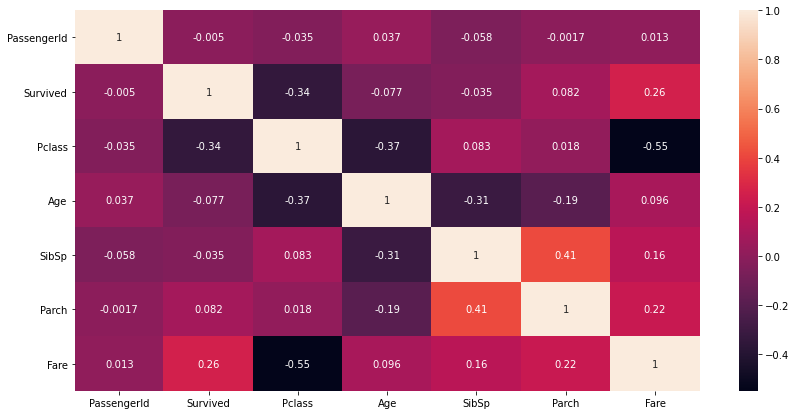

In [75]:
corr_matrix = train_data.corr()
corr_matrix['Survived']
plt.figure(figsize=(14,7))
sns.heatmap(corr_matrix,annot=True)
#Using correlation coefficient to find out the relation between features and labels.

In [76]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


C:\Users\Shanthosh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    549
1    342
Name: Survived, dtype: int64

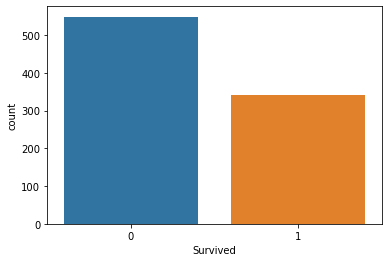

In [77]:
sns.countplot(train_data['Survived'])
train_data['Survived'].value_counts()

<AxesSubplot:xlabel='Sex', ylabel='count'>

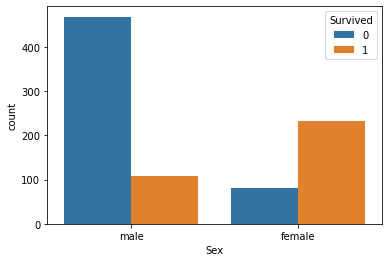

In [78]:
sns.countplot(x='Sex',hue='Survived',data=train_data)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

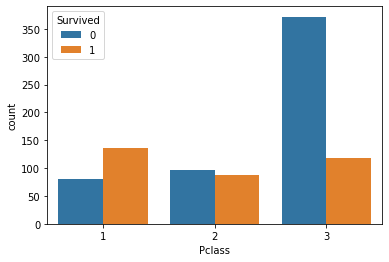

In [79]:
sns.countplot(x='Pclass',hue='Survived',data=train_data)

<AxesSubplot:>

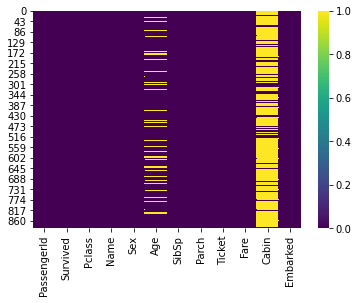

In [80]:
sns.heatmap(train_data.isnull(),cmap='viridis')
#Gives us an idea about the missing values in the dataset

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

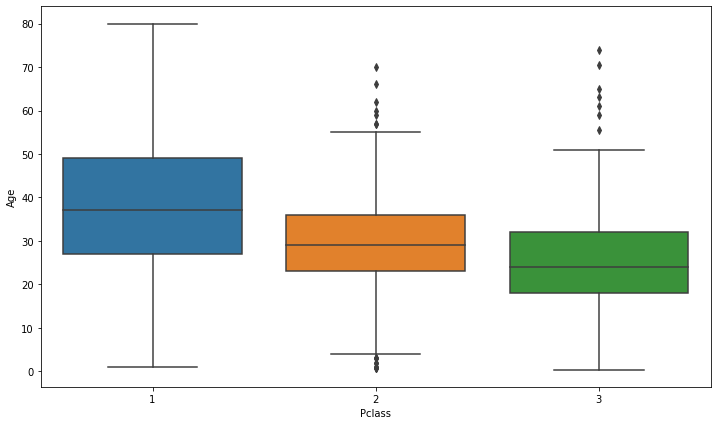

In [81]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train_data)

Since age group of a person depends upon Pclass, it makes sense to fill the missing values according to the median age of each Pclass 

In [83]:
def fill_age(cols):
    
    age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 30
        else:
            return 25
    else:
        return age

In [84]:
train_data['Age'] = train_data[['Age','Pclass']].apply(fill_age,axis=1)

<AxesSubplot:>

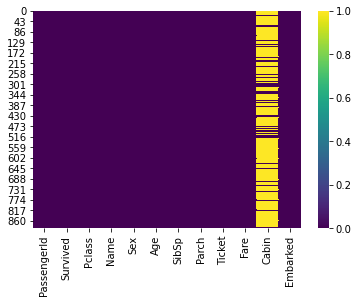

In [85]:
sns.heatmap(train_data.isnull(),cmap='viridis')

In [86]:
gender = pd.get_dummies(train_data['Sex'],drop_first=True)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [90]:
train_data['Gender'] = gender
#train_data.drop(['Name','Sex','Ticket','Embarked','Cabin'],axis=1,inplace=True)
train_data.drop(['Cabin'],axis=1,inplace=True)
train_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,1,0,3,22.0,1,0,7.2500,1
1,2,1,1,38.0,1,0,71.2833,0
2,3,1,3,26.0,0,0,7.9250,0
3,4,1,1,35.0,1,0,53.1000,0
4,5,0,3,35.0,0,0,8.0500,1


In [92]:
Y_train = train_data['Survived']
print(Y_train)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [99]:
X_train = train_data
print(X_train)

     PassengerId  Pclass   Age  SibSp  Parch     Fare  Gender
0              1       3  22.0      1      0   7.2500       1
1              2       1  38.0      1      0  71.2833       0
2              3       3  26.0      0      0   7.9250       0
3              4       1  35.0      1      0  53.1000       0
4              5       3  35.0      0      0   8.0500       1
..           ...     ...   ...    ...    ...      ...     ...
886          887       2  27.0      0      0  13.0000       1
887          888       1  19.0      0      0  30.0000       0
888          889       3  25.0      1      2  23.4500       0
889          890       1  26.0      0      0  30.0000       1
890          891       3  32.0      0      0   7.7500       1

[891 rows x 7 columns]


# Building a Classification Model

Logistic Regression was chosen since it is the primary classifcation algorithm one can think of.

In [117]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,Y_train1,Y_test1 = train_test_split(X_train,Y_train,test_size=0.3,random_state=42)

In [118]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train1,Y_train1)

C:\Users\Shanthosh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [119]:
model.score(X_test1,Y_test1)

0.7761194029850746

# Hyperparameter Tuning and choosing the best model

Hyperparameter Tuning is done using GridSearchCV. This will choose a set of optimal parameters for an algorithm. Several other classification algorithms like RandomForestClassifier, SupportVectorClassification are tested and the best can be chosen according to their performance. 

In [126]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [127]:
model_params = {
    'svm': {
        'model':svm.SVC(gamma='auto'),
        'params':{
            'C':[1,10,20],
            'kernel':['rbf','linear']
        }
    },
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[1,5,10]
        }
    },
    'logistic_regression':{
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params':{
            'C':[1,5,10]
        }
    }
}

In [128]:
scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    clf.fit(X_train1,Y_train1)
    scores.append({
        'model':model_name,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })
    

In [129]:
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.789600,"{'C': 10, 'kernel': 'linear'}"
1,random_forest,0.789729,{'n_estimators': 5}
2,logistic_regression,0.797742,{'C': 1}


From the scores above, we can see that Logistic Regression performs relatively better.

# Manipulating Test data

In [104]:
test_data = pd.read_csv(r'C:\Users\Shanthosh\OneDrive\Desktop\Titanic Dataset\test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [105]:
test_data['Age'] = test_data[['Age','Pclass']].apply(fill_age,axis=1)


In [106]:
def fill_fare(cols):
    fare = cols[0]
    
    if pd.isnull(fare):
        return 32.2 #32.2 is the mean of Fare prices
    else:
        return fare

In [107]:
test_data['Fare'] = test_data[['Fare']].apply(fill_fare,axis=1)


In [108]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [109]:
Gender = pd.get_dummies(test_data['Sex'],drop_first=True)

In [111]:
test_data['Gender'] = gender
test_data.drop(['Name','Sex','Ticket','Embarked','Cabin'],axis=1,inplace=True)
test_data.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Gender
0,892,3,34.5,0,0,7.8292,1
1,893,3,47.0,1,0,7.0000,0
2,894,2,62.0,0,0,9.6875,0
3,895,3,27.0,0,0,8.6625,0
4,896,3,22.0,1,1,12.2875,1


In [112]:
model.predict(test_data)

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,